
# Bike Sharing Assignment by Gloria


## Sept 1. Importing Libraries

In [1]:
# importing necessary libraries

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns


In [2]:
# Supress Warnings

import warnings

warnings.filterwarnings('ignore')


In [3]:
# importing various regression libraries

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import datetime


## Step 2. Data Sourcing

In [4]:

bikes_df=pd.read_csv('day.csv')


In [5]:

bikes_df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796



### Inspecting the Dataframe


In [6]:

bikes_df.shape


(730, 16)


#### Finding: Data frame has 730 rows and 16 columns


In [7]:

bikes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB



#### Findings : 

1. #### No missing values found

2. #### All the variables are either int or float except 'dteday', however we may need to consider some of the numeric variables as categorical - like mnth,season,weathersit etc.


In [8]:
# Descriptive statistics of the numeric variables

bikes_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Duplicate Checking

In [9]:

bikes_df.drop_duplicates(subset=None, inplace=True)

bikes_df.shape


(730, 16)

#### Findings: 

The shape before and after running the drop duplicate command is the same, hence we can conclude that there were not any duplicate values in the dataset.



#### Casual, Registered Count & Total Count - Our aim for this assignment is to predict the final count (irrespective of casual & registered count)


In [10]:
#It is quite intuitive that the target 'cnt' is the sum of casual' and 'registered', lets check

bike_cnt=bikes_df[['casual','registered','cnt']]

bike_cnt['total'] = bike_cnt.casual+bike_cnt.registered

bike_cnt[['total','cnt']]


,total,cnt
0,985,985
1,801,801
2,1349,1349
3,1562,1562
4,1600,1600
...,...,...
725,2114,2114
726,3095,3095
727,1341,1341
728,1796,1796


<function matplotlib.pyplot.show(close=None, block=None)>

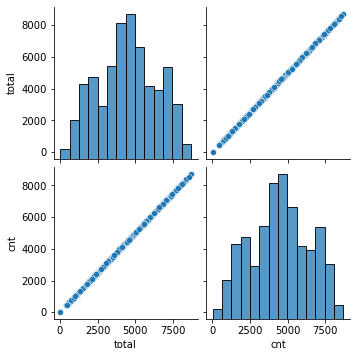

In [11]:
# Lets further verify this using pair plot.

sns.pairplot(bike_cnt[['total','cnt']])

plt.show


#### It is quite evident that 'cnt' is the sum of the columns 'casual' and 'registered'. Hence we will drop these redundant columns

In [12]:

bikes_df.drop(['casual','registered'],axis=1, inplace=True)



## Step 3. Encoding & Visualizing the data


In [13]:
# Define a function for univariate analysis on different numeric variables

def uni_plot(x,title,xlabel):
    
    plt.figure(figsize=[15,5])

    plt.subplot(1,2,1)

    plt.title("Distribution of independent variable  " +xlabel+"\n",fontsize=20,color='Brown',loc='center')

    s1=sns.boxplot(data=bikes_df,x=x,palette="viridis_r")

    s1.set_xlabel(xlabel,fontsize=15,color='Brown')


    plt.subplot(1,2,2)

    s2=sns.distplot(bikes_df[x],color='green')

    s2.set_xlabel(xlabel,fontsize=15,color='Brown')


    plt.show()
    

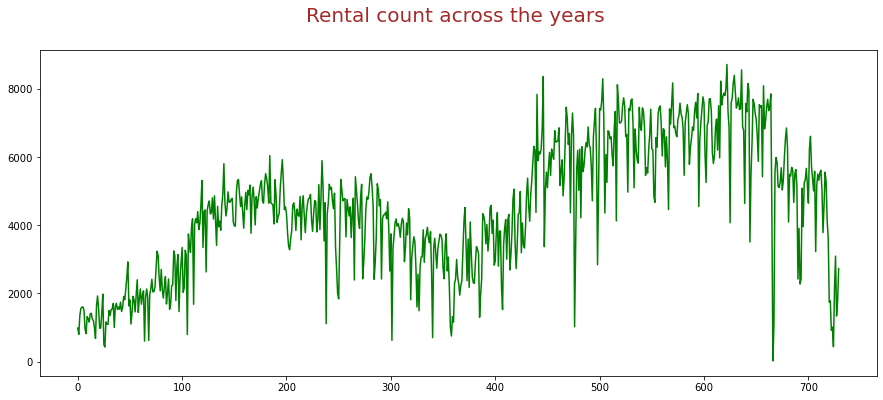

In [14]:

# Let's see a general tred for the bike rentals for year 2018 and 2019

plt.figure(figsize=[15,6])

plt.plot(bikes_df.cnt,c='g')

plt.title('Rental count across the years \n',fontsize=20,c='brown')

plt.show()


### Findings:

Since the data shows the trend for the year 2018 and 2019, its quite evident that there is an overall increase in rental in 2019 compared to 2018. Also the rentals are more towards the middle months of the year. But towards the end of year 2019 the rentals got a sharp dip.


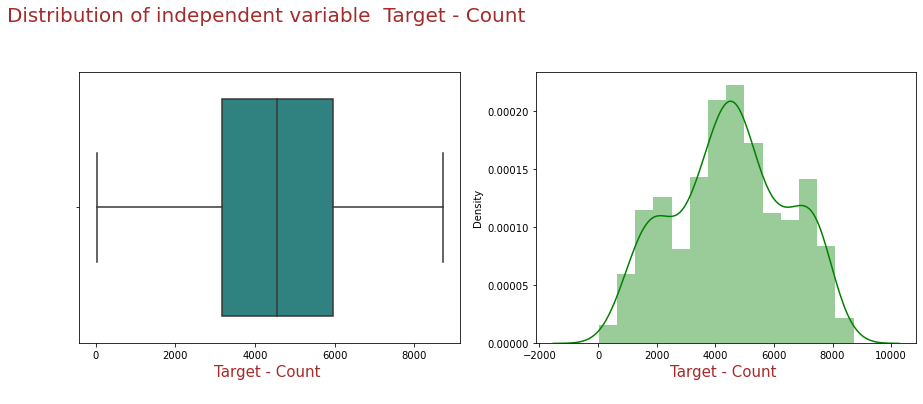

In [15]:
# DIstribution of Target variable 'cnt'

uni_plot('cnt','Distribution of Target variable cnt \n',"Target - Count \n")



#### There are no outliers in the taregt variable however the data is not a perfect bell curve but it is not skewed either.


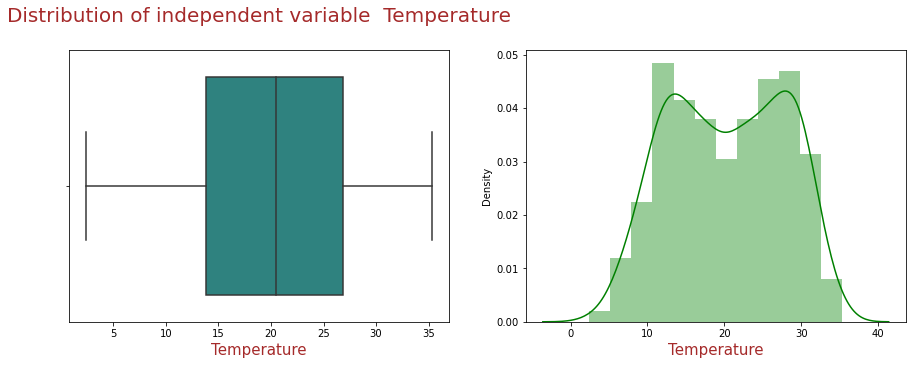

In [16]:
# DIstribution of predictor variable 'Temp'

uni_plot('temp','Distribution of independent variable temp',"Temperature")



#### No outliers for temp. 


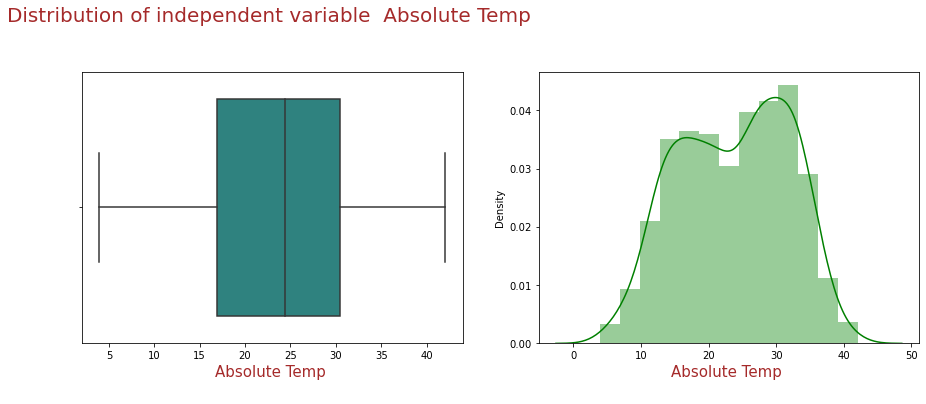

In [17]:
# DIstribution of predictor variable 'Absolute Temp'

uni_plot('atemp','Distribution of independent variable atemp\n',"Absolute Temp \n")



#### 'temp' and 'atemp' is having almost the same distribution, we need to further analysis the correlation between the two variables to avoid any multicollinearity issue.


In [18]:
bikes_df[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000



#### There is very strong correaltion between temp and atemp, we can drop one of the variable right away or let the RFE drop one later.


,temp,atemp
0,14.110847,18.18125
1,14.902598,17.68695
2,8.050924,9.47025
3,8.200000,10.60610
4,9.305237,11.46350
...,...,...
725,10.420847,11.33210
726,10.386653,12.75230
727,10.386653,12.12000
728,10.489153,11.58500


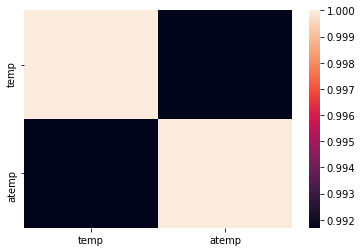

In [19]:
sns.heatmap(bikes_df[['temp', 'atemp']].corr())

bikes_df[['temp', 'atemp']]

In [20]:
# Since the columns 'temp' and 'atemp' are highly correlated, we cant use both in our final dataset, hence we will derive a new variable as a mean of both the columns.

bikes_df['mean_temp']=bikes_df[['atemp','temp']].mean(axis=1)

bikes_df['mean_temp']


0      16.146048
1      16.294774
2       8.760587
3       9.403050
4      10.384369
         ...    
725    10.876473
726    11.569477
727    11.253327
728    11.037077
729    10.011751
Name: mean_temp, Length: 730, dtype: float64

In [21]:
# Now we will drop the redundant columns 'temp' and 'atemp'

bikes_df.drop(['atemp','temp'],axis=1,inplace=True)


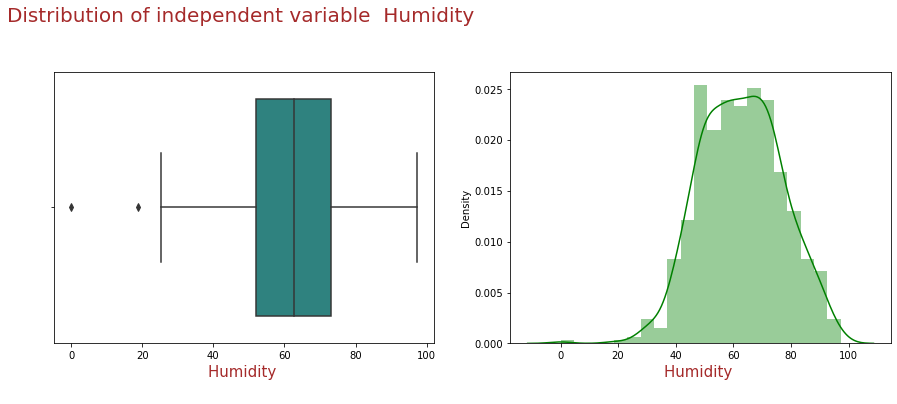

In [22]:

# Distribution of predictor variable 'hum'

uni_plot('hum','Distribution of independent variable hum \n',"Humidity \n")



#### There are some outlieris in humidity, need further analysis


In [23]:
#There seems to be some outliers

bikes_df.hum.describe()


count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [24]:
# Here the minimum humidity is zero, zero humidity is an unusual value and we need to impute it.

bikes_df[bikes_df.hum==0]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,cnt,mean_temp
68,69,10-03-2018,1,0,3,0,6,0,3,0.0,17.545759,623,17.618066


In [25]:
# Get the index location for the hum=0 and assign it to variable x

x=bikes_df.loc[bikes_df.hum==0].index[0]


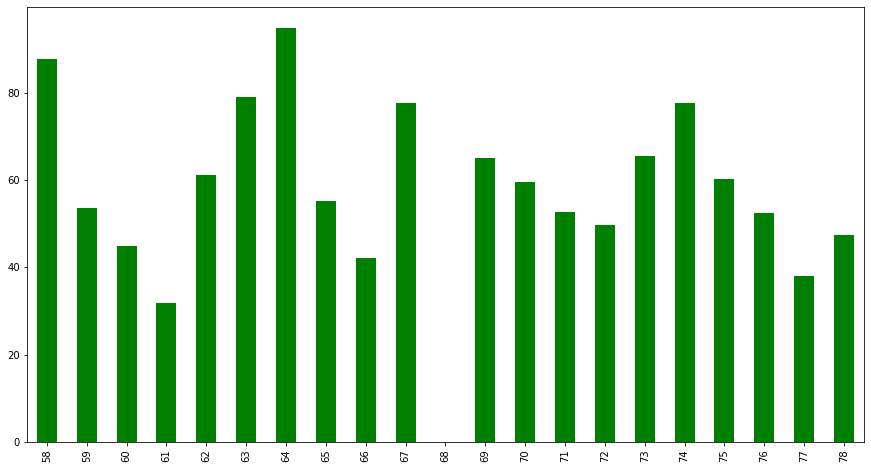

In [26]:
# View the distribution of humidity on other days near the zero humidity day

plt.figure(figsize=[15,8])

bikes_df.loc[x-10:x+10,'hum'].plot.bar(color='g')

plt.show()



#### The humidity is quite high around the zero humidity days, hence we will impute the zero humidity with the mean humidity of the past and post 10 days humidity.


In [27]:

mean_hum=bikes_df.loc[x-10:x+10,'hum'].mean()

bikes_df.hum=bikes_df.hum.replace({0.0:mean_hum})


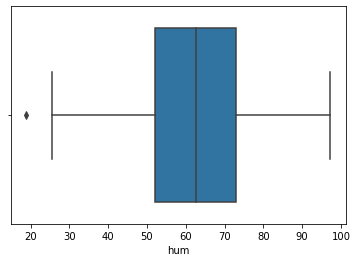

In [28]:
# Also there are still some outliers in the lower range 

sns.boxplot(bikes_df.hum)

plt.show()


# Lets go ahead and remove the outlier

bikes_df=bikes_df[bikes_df.hum>bikes_df.hum.quantile(.0001)]

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

sns.distplot(bikes_df.hum)

plt.subplot(1,2,2)

sns.boxplot(bikes_df.hum,palette='viridis_r')


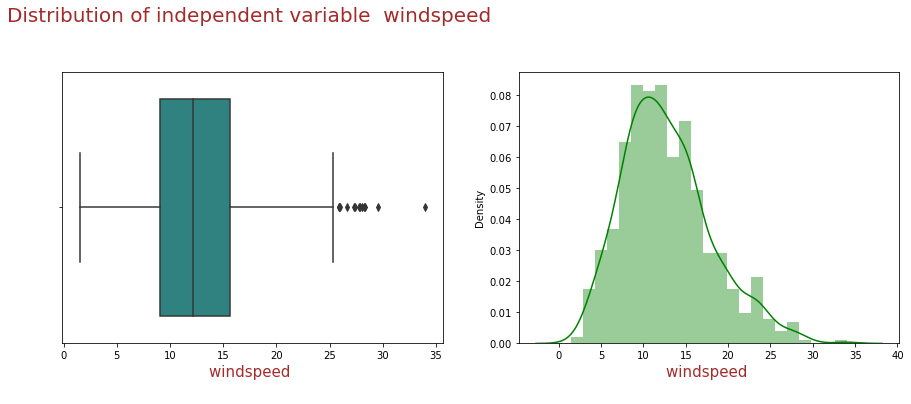

In [29]:

# DIstribution of predictor variable 'windspeed'

uni_plot('windspeed','Distribution of independent variable windspeed \n',"windspeed \n")



#### Windspeed almost  has a normal distribution without much skews, however there are some outliers in the upper range



bikes_df=bikes_df[bikes_df.windspeed<bikes_df.windspeed.quantile(.99)]


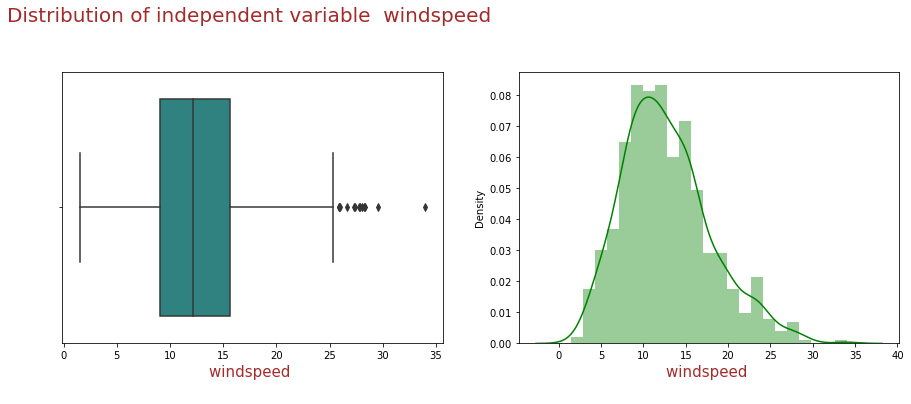

In [30]:

# DIstribution of predictor variable 'windspeed'

uni_plot('windspeed','Distribution of independent variable windspeed \n',"windspeed \n")


In [31]:
#Inspect the date column dteday - it is in string format, hence we will convert it to Pandas Datetime format

bikes_df['dteday']=pd.to_datetime(bikes_df['dteday'])


In [32]:
# We will create a new column Date from the 'dteday'

bikes_df.insert(column='Date',loc=5,value=bikes_df['dteday'].dt.day)

bikes_df['Date']


0       1
1       1
2       1
3       1
4       1
       ..
725    27
726    28
727    29
728    30
729    31
Name: Date, Length: 730, dtype: int64

In [33]:

#Lets drop 'instant' and 'dteday' which are redundant

bikes_df.drop(['instant','dteday'],axis=True,inplace=True)


In [34]:

bikes_df.head(10)


,season,yr,mnth,Date,holiday,weekday,workingday,weathersit,hum,windspeed,cnt,mean_temp
0,1,0,1,1,0,1,1,2,80.5833,10.749882,985,16.146048
1,1,0,1,1,0,2,1,2,69.6087,16.652113,801,16.294774
2,1,0,1,1,0,3,1,1,43.7273,16.636703,1349,8.760587
3,1,0,1,1,0,4,1,1,59.0435,10.739832,1562,9.403050
4,1,0,1,1,0,5,1,1,43.6957,12.522300,1600,10.384369
5,1,0,1,1,0,6,0,1,51.8261,6.000868,1606,10.019359
6,1,0,1,1,0,0,0,2,49.8696,11.304642,1510,9.249676
7,1,0,1,1,0,1,1,2,53.5833,17.875868,959,7.438850
8,1,0,1,1,0,2,1,1,43.4167,24.250650,822,5.740201
9,1,0,1,1,0,3,1,1,48.2917,14.958889,1321,6.864277


In [35]:
# some data relabelling

bikes_df.rename(columns={'mnth':'Month','yr':'Year'},inplace=True)


#### Seasons

Season column is categorical column with each value corresponding to specific season. 

For better readablity and to generate dummy variable as it is a Categorical Nominal Type Data, We shall map this column as follows:

1: spring
2: summer
3: fall
4: winter

In [36]:

bikes_df['season']=bikes_df[['season']].apply(lambda x:x.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}))


In [37]:

season_dist = bikes_df.groupby(by='season').cnt.mean().sort_values()


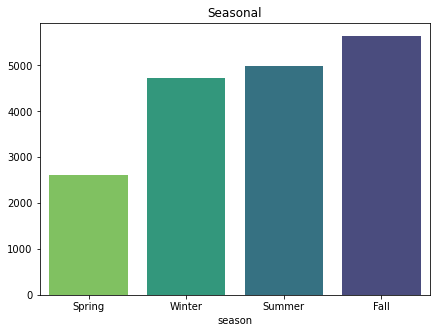

In [38]:

plt.figure(figsize=[7,5])

sns.barplot(x=season_dist.index,y=season_dist.values,palette='viridis_r')

plt.title('Seasonal')

plt.show()


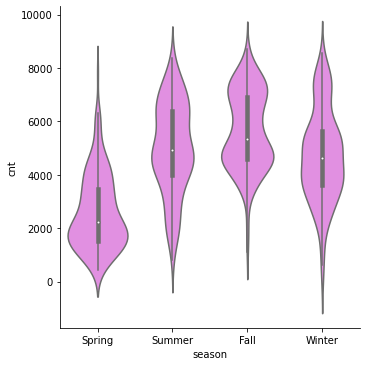

In [39]:

sns.catplot(x='season',y='cnt', kind='violin',data=bikes_df, color='violet')

plt.show()



#### Finding : Average rides in Fall seems to be higher where as the rides are less in Spring.

#### Bike rentals were high in Fall with a median of over 5000 bookings (for two years) followed by Summer & Winter. Rentals were least in spring season. This indicates that the season can be a good predictor of the target variable.


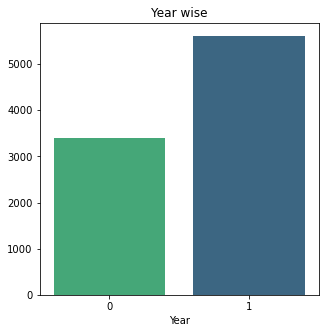

In [40]:

yr_dist = bikes_df.groupby(by='Year').cnt.mean().sort_values()

plt.figure(figsize=(5,5))

sns.barplot(x=yr_dist.index,y=yr_dist.values,palette='viridis_r')

plt.title('Year wise')

plt.show()


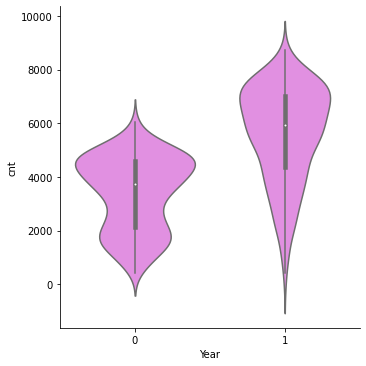

In [41]:

sns.catplot(x='Year',y='cnt', kind='violin',data=bikes_df, color='violet')

plt.show()



#### Finding : Ride count is higher in year 2019 compared to the previous year. The median ride was around 4000 in 2018 where as it increase to 6000 in 2019. It shows year is also a good predictor of target.


In [42]:
# Convert the month number to the respective Month Names

bikes_df.Month = bikes_df.Month.apply(lambda x: datetime.date(3000, x , 1).strftime('%B'))

bikes_df.Month


0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: Month, Length: 730, dtype: object

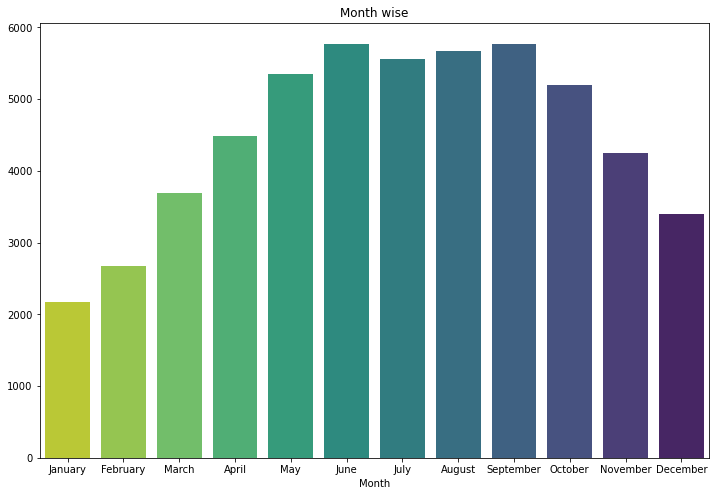

In [43]:

month_dist = bikes_df.groupby(by='Month').cnt.mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month_dist = month_dist.reindex(new_order, axis=0)


plt.figure(figsize=(12,8))

sns.barplot(x=month_dist.index,y=month_dist.values,palette='viridis_r')

plt.title('Month wise')

plt.show()


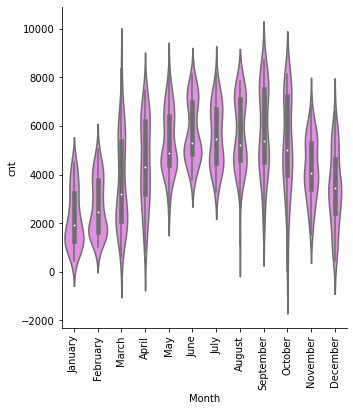

In [44]:

sns.catplot(x='Month',y='cnt', kind='violin',data=bikes_df, color='violet')

plt.xticks(rotation=90)

plt.show()



#### Finding: 

1. #### High demand for the bikes in during the months starting from May to October with a median between 4000 and 5000 rides per month, however rides are lesser towards the beginning and end of the year.
2. #### It indicates that the variable 'mnth' has some trend for bookings and can be a good predictor for the 'cnt'.



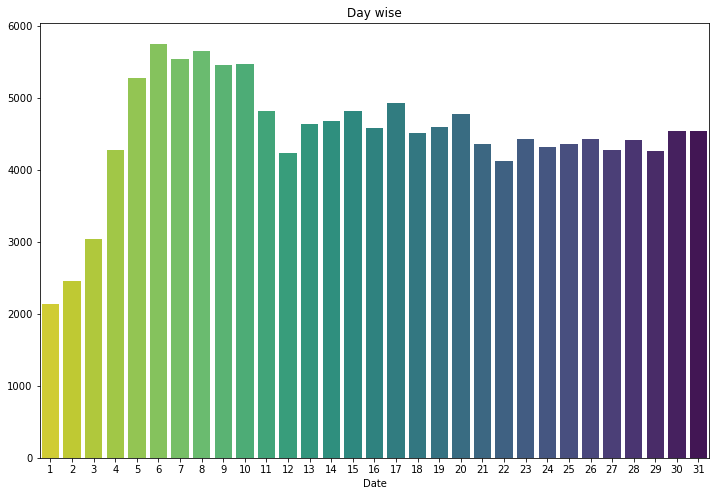

In [45]:

# Distribution of rentals on days across the Month

day_dist = bikes_df.groupby(by='Date').cnt.mean().sort_values()

plt.figure(figsize=(12,8))

sns.barplot(x=day_dist.index,y=day_dist.values,palette='viridis_r')

plt.title('Day wise')

plt.show()



#### Finding : Rentals are comparatively lesser in the beginning of a month


In [46]:
# label the weekdays

bikes_df['weekday'] = bikes_df.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})


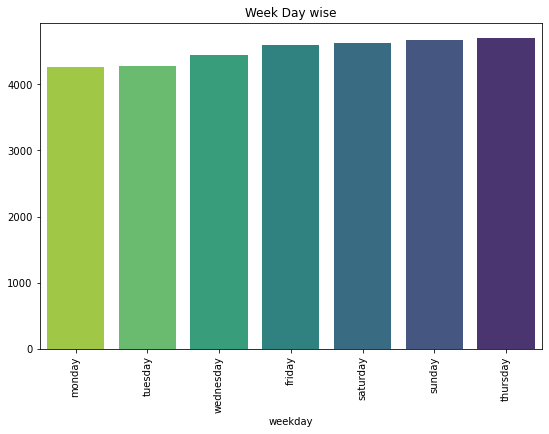

In [47]:

weekday_dist = bikes_df.groupby(by='weekday').cnt.mean().sort_values()

plt.figure(figsize=(9,6))

sns.barplot(x=weekday_dist.index,y=weekday_dist.values,palette='viridis_r')

plt.xticks(rotation=90)

plt.title('Week Day wise')

plt.show()


<Figure size 1440x576 with 0 Axes>

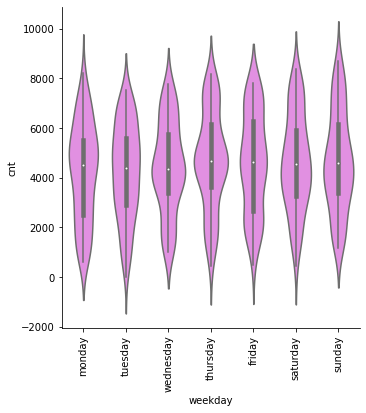

In [48]:
plt.figure(figsize=(20,8))

sns.catplot(x='weekday',y='cnt', kind='violin',data=bikes_df, color='violet')

plt.xticks(rotation=90)

plt.show()


#### Finding : No specific pattern across the week.

#### weekday variable does not have any specific trend having the medians between 4000 to 5000 bookings across the whole week and almost shows a unoform distribution. Hence this variable can have some or no influence on the predictor. 


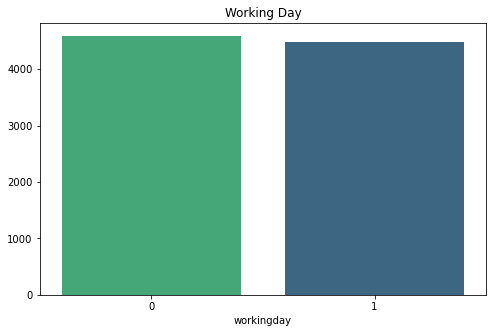

In [49]:

workingday_dist = bikes_df.groupby(by='workingday').cnt.mean().sort_values()

plt.figure(figsize=(8,5))

sns.barplot(x=workingday_dist.index,y=workingday_dist.values,palette='viridis_r')

plt.title('Working Day')

plt.show()


<Figure size 1440x576 with 0 Axes>

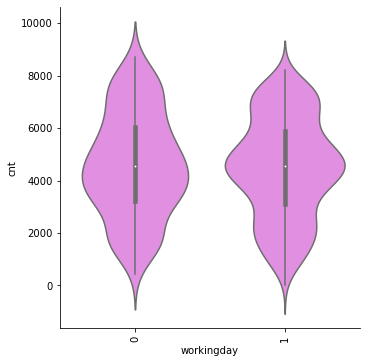

In [50]:

plt.figure(figsize=(20,8))

sns.catplot(x='workingday',y='cnt', kind='violin',data=bikes_df, color='violet')

plt.xticks(rotation=90)

plt.show()



#### Finding : No specific pattern between working day and non working days.

- #### Working and non working day shows almost the same distibution with meadian of just above 4000 bookings per day (for two years).

- ##### It indicates that the workingday variable does not have any significant impact on the target variable.



In [51]:
# Labelling weather condition

bikes_df['weathersit'] = bikes_df.weathersit.map({1: 'Clear Sky', 2: 'Misty', 3: 'Light', 4: 'Heavy Rain'})


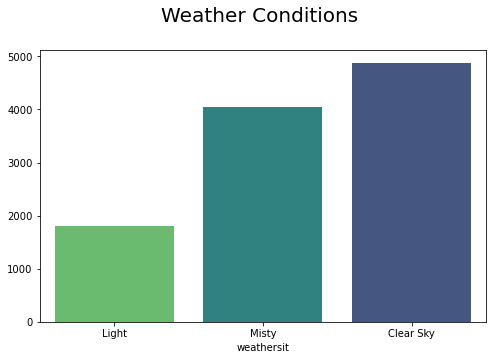

In [52]:

weather_dist = bikes_df.groupby(by='weathersit').cnt.mean().sort_values()

plt.figure(figsize=(8,5))

sns.barplot(x=weather_dist.index,y=weather_dist.values,palette='viridis_r')

plt.title('Weather Conditions \n',fontsize=20)

plt.show()


<Figure size 1440x576 with 0 Axes>

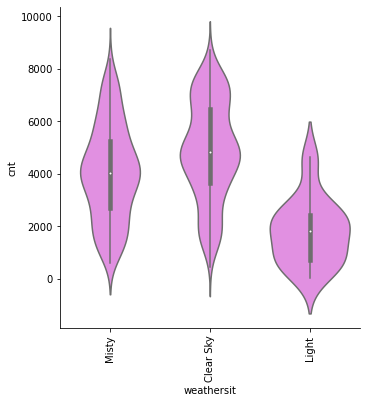

In [53]:
plt.figure(figsize=(20,8))

sns.catplot(x='weathersit',y='cnt', kind='violin',data=bikes_df, color='violet')

plt.xticks(rotation=90)

plt.show()



#### Finding : Looks like weather condition has an impact on the ride count, rides are less in Light weather and more on days with clear sky and mist. This shows that the weathersit variable can have an impact on the target variable as well.



### Now plot all the box plot together for each categorcal variable against the target to have a better understanding


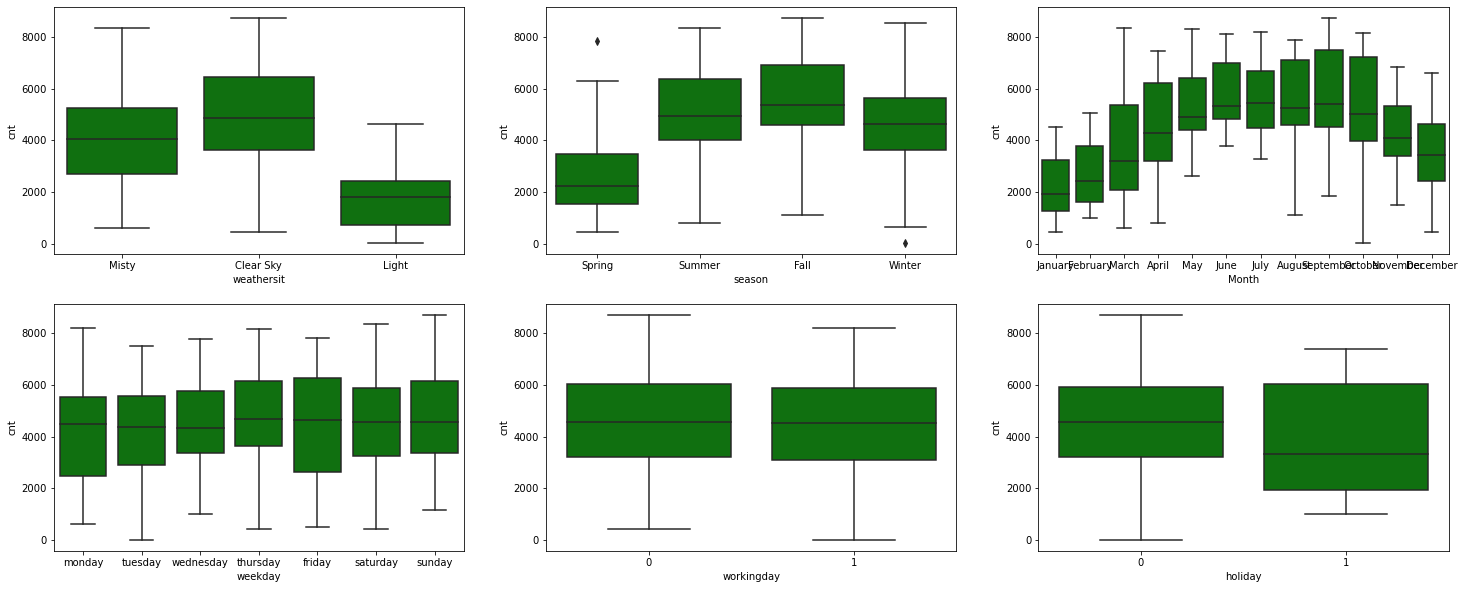

In [54]:

plt.figure(figsize=(25,10))

plt.subplot(2,3,1)

sns.boxplot(x='weathersit',y='cnt',data=bikes_df, color='Green')

plt.subplot(2,3,2)

sns.boxplot(x='season',y='cnt',data=bikes_df, color='Green')

plt.subplot(2,3,3)

sns.boxplot(x='Month',y='cnt',data=bikes_df, color='Green')

plt.subplot(2,3,4)

sns.boxplot(x='weekday',y='cnt',data=bikes_df, color='Green')

plt.subplot(2,3,5)

sns.boxplot(x='workingday',y='cnt',data=bikes_df, color='Green')

plt.subplot(2,3,6)

sns.boxplot(x='holiday',y='cnt',data=bikes_df, color='Green')


plt.show()

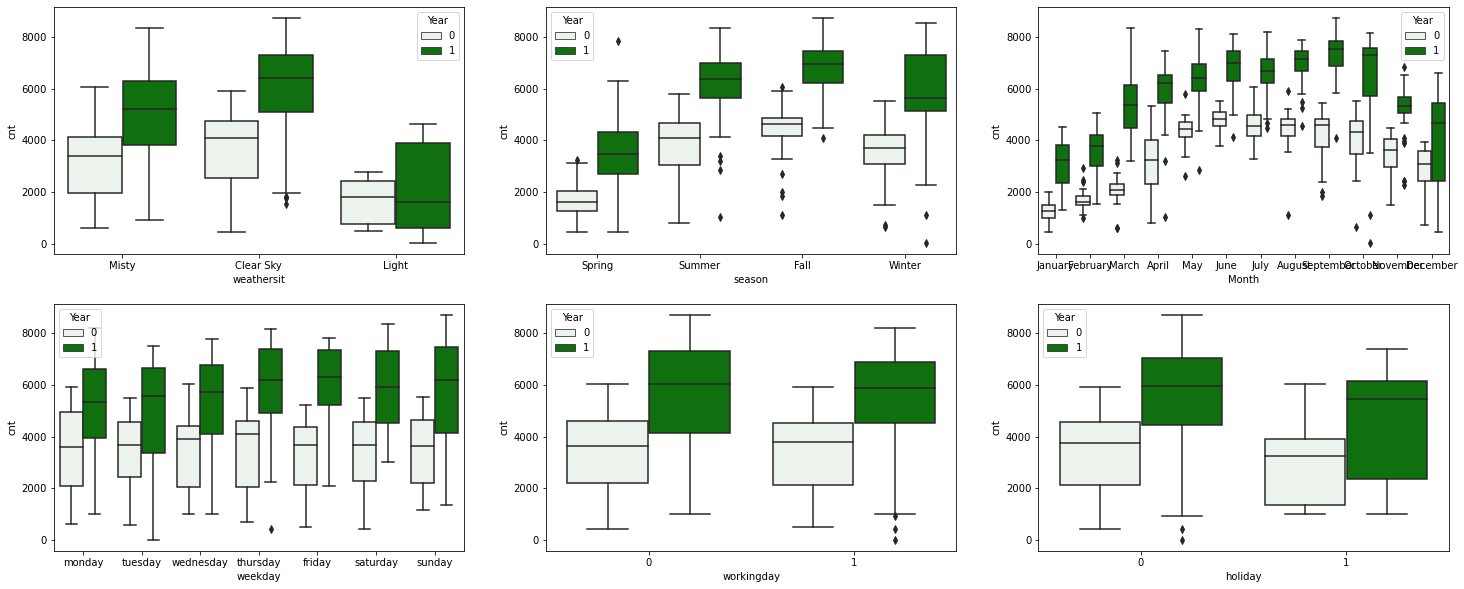

In [55]:

plt.figure(figsize=(25,10))

plt.subplot(2,3,1)

sns.boxplot(x='weathersit',y='cnt',data=bikes_df, color='Green',hue='Year')

plt.subplot(2,3,2)

sns.boxplot(x='season',y='cnt',data=bikes_df, color='Green',hue='Year')

plt.subplot(2,3,3)

sns.boxplot(x='Month',y='cnt',data=bikes_df, color='Green',hue='Year')

plt.subplot(2,3,4)

sns.boxplot(x='weekday',y='cnt',data=bikes_df, color='Green',hue='Year')

plt.subplot(2,3,5)

sns.boxplot(x='workingday',y='cnt',data=bikes_df, color='Green',hue='Year')

plt.subplot(2,3,6)

sns.boxplot(x='holiday',y='cnt',data=bikes_df, color='Green',hue='Year')


plt.show()



In [56]:
# We will check the dataframe once again

bikes_df.head()


,season,Year,Month,Date,holiday,weekday,workingday,weathersit,hum,windspeed,cnt,mean_temp
0,Spring,0,January,1,0,monday,1,Misty,80.5833,10.749882,985,16.146048
1,Spring,0,January,1,0,tuesday,1,Misty,69.6087,16.652113,801,16.294774
2,Spring,0,January,1,0,wednesday,1,Clear Sky,43.7273,16.636703,1349,8.760587
3,Spring,0,January,1,0,thursday,1,Clear Sky,59.0435,10.739832,1562,9.403050
4,Spring,0,January,1,0,friday,1,Clear Sky,43.6957,12.522300,1600,10.384369



### Lets do the pairplot for all the numeric predictors Vs Target


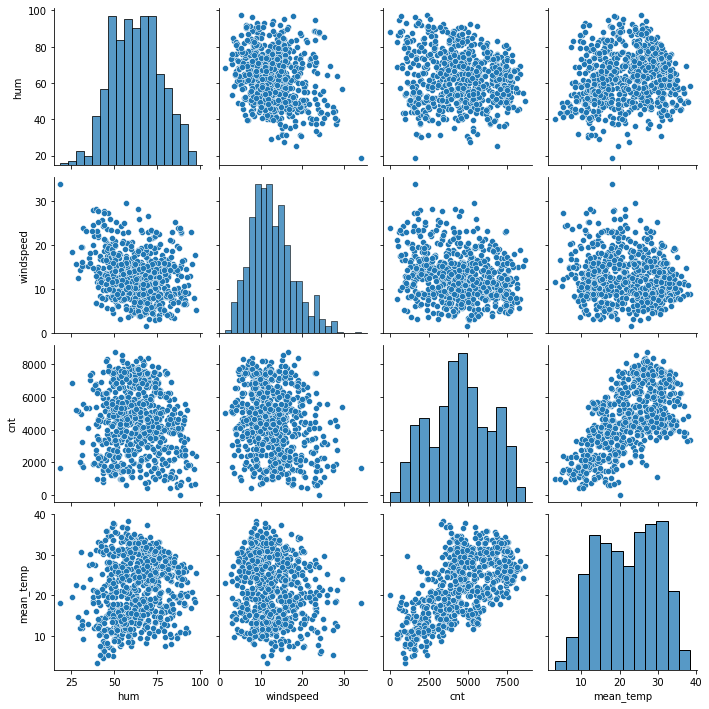

In [57]:
    
num_cols=['weathersit','hum','windspeed','cnt','mean_temp']

sns.pairplot(bikes_df[num_cols])

plt.show()


#### Findings from the pairplot:


- Ride Count seems to be very much lienarly dependent on mean_temp.

- Humidity & windspeed does not indicate any specific behaviour by visualising the data.



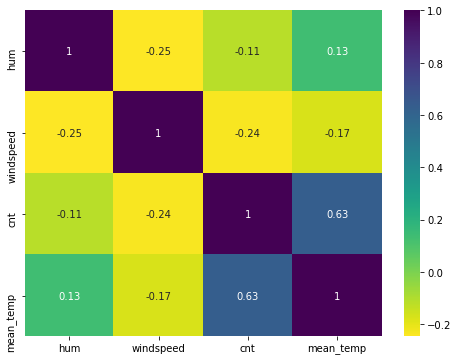

In [58]:
# A heat map will provide a more intuitive insights

plt.figure(figsize = (8,6))

sns.heatmap(bikes_df[num_cols].corr(), annot = True,cmap='viridis_r')

plt.show()



#### Findings: There is very strong positive correlation between mean_temp and 'cnt'



## Step 4. Data Preparation


In [59]:
# Create dummy variables for all the categorical variables

dummy_variables = ['Month', 'season', 'weekday', 'weathersit']

dummies=pd.get_dummies(bikes_df[dummy_variables], drop_first=True)

bikes_df = pd.concat([bikes_df, dummies], axis=1)

bikes_df.drop(columns=dummy_variables,inplace=True)


In [60]:
# Inspect the columns now

bikes_df.columns


Index(['Year', 'Date', 'holiday', 'workingday', 'hum', 'windspeed', 'cnt',
       'mean_temp', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'season_Spring',
       'season_Summer', 'season_Winter', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_Light', 'weathersit_Misty'],
      dtype='object')

In [61]:

bikes_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               730 non-null    int64  
 1   Date               730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   mean_temp          730 non-null    float64
 8   Month_August       730 non-null    uint8  
 9   Month_December     730 non-null    uint8  
 10  Month_February     730 non-null    uint8  
 11  Month_January      730 non-null    uint8  
 12  Month_July         730 non-null    uint8  
 13  Month_June         730 non-null    uint8  
 14  Month_March        730 non-null    uint8  
 15  Month_May          730 non-null    uint8  
 16  Month_November     730 non


### We have 30 numeric columns now



## Step 5. Splitting the Data into Train and Test sets


In [62]:

from sklearn.model_selection import train_test_split

bk_train, bk_test = train_test_split(bikes_df, train_size=0.7,random_state=100)


In [63]:

bk_train.shape


(510, 30)

In [64]:

bk_test.shape


(220, 30)

In [65]:

bk_test


,Year,Date,holiday,workingday,hum,windspeed,cnt,mean_temp,Month_August,Month_December,...,season_Summer,season_Winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light,weathersit_Misty
184,0,7,1,0,63.7917,5.459106,6043,31.532099,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,20,0,1,59.2083,7.625404,6211,34.065625,0,0,...,1,0,0,0,0,1,0,0,0,0
299,0,27,0,0,81.2917,13.250121,2659,21.061150,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,8,0,1,42.4167,13.417286,4780,32.841248,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,6,0,0,30.5000,19.583229,4968,30.756050,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,12,0,1,73.3750,11.666643,6606,21.480927,0,1,...,0,1,0,0,0,0,0,1,0,0
127,0,5,0,1,63.1667,5.000712,4333,23.804152,0,0,...,1,0,0,0,0,0,1,0,0,0
640,1,10,0,1,79.3750,4.458569,7572,28.457075,0,0,...,0,1,0,0,0,1,0,0,0,1
72,0,14,0,1,49.6957,9.174042,2046,14.966949,0,0,...,0,0,0,0,0,0,0,1,0,0


### Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_variables = [ 'mean_temp','hum', 'windspeed', 'cnt'] # Columns to be scaled

bk_train[num_variables]=scaler.fit_transform(bk_train[num_variables])


In [67]:

bk_train


,Year,Date,holiday,workingday,hum,windspeed,cnt,mean_temp,Month_August,Month_December,...,season_Summer,season_Winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Light,weathersit_Misty
576,1,31,0,1,0.659744,0.264686,0.827658,0.795099,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,3,0,0,0.553780,0.255342,0.465255,0.443978,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,30,0,1,0.377528,0.663106,0.204096,0.222805,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,28,0,0,0.385516,0.188475,0.482973,0.396611,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,22,0,0,0.692225,0.380981,0.191095,0.333906,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,8,0,1,0.602768,0.187140,0.832835,0.849258,1,0,...,0,0,0,0,0,0,0,0,0,0
53,0,23,0,1,0.300481,0.111379,0.218017,0.212911,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,17,0,1,0.476570,0.431816,0.312586,0.236802,0,1,...,0,1,1,0,0,0,0,0,0,1
79,0,21,0,1,0.702203,0.529881,0.236424,0.450779,0,0,...,1,0,0,0,0,0,0,1,0,1



### Manual Analysis of Variables (using Correlaion-Co-efficient)


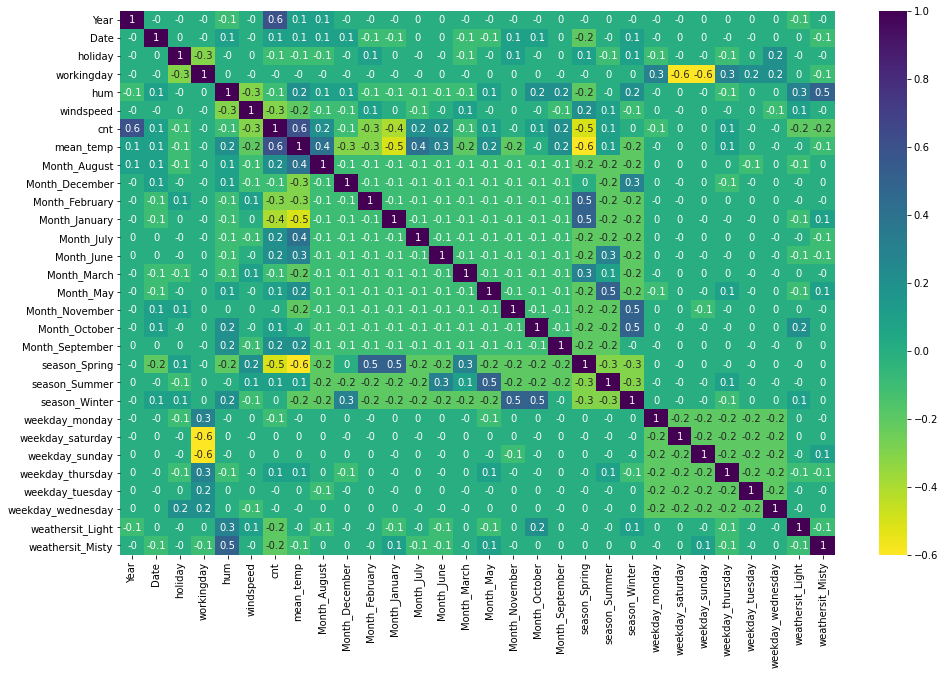

In [68]:

bk_train.corr()

plt.figure(figsize=(16, 10))

sns.heatmap(round(bk_train.corr(), 1), annot=True, cmap='viridis_r')

plt.show()



### Findings from the heatmap

- ### 'mean_temp' and 'Year' are showing the highest positive correlation of 0.6 with the target variable 'cnt'

- ### 'season_Spring' is showing a strong negative correlation of 0.5

- ### 'Month_February','Month_January' and 'windspeed' variables are negatively correlated by 0.4

- ### 'weatehrsit_Misty' and 'weatehrsit_Light' are also showing a negative correlation of 0.2

- ### 'Month_Sptember' and 'Month_August' which are summer months showing a favourable correlation of 0.2


In [69]:
# Splitting X and y for model building

y_train = bk_train.pop('cnt')

X_train = bk_train



## Step 6. Iterative Modeling Process


In [70]:
## Create a linear Regression Model

y_train=y_train.values.reshape(510,1)

lm = LinearRegression()

lm.fit(X_train, y_train)


LinearRegression()


## Recursive feature elimination

####  We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as True & remaining as False.


In [71]:

rfe = RFE(lm, 15)

rfe = rfe.fit(X_train, y_train)


In [72]:

rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})

rfe_df.sort_values(by='Ranking')


,Predictor,Select Status,Ranking
0,Year,True,1
20,season_Winter,True,1
18,season_Spring,True,1
17,Month_September,True,1
15,Month_November,True,1
27,weathersit_Light,True,1
11,Month_July,True,1
10,Month_January,True,1
9,Month_February,True,1
28,weathersit_Misty,True,1


- #### RFE method has successfully evaluated top 15 predictors which will impact our outcome.

- #### But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements.

### Regression Model 1

In [73]:
# Select only the variables ranked by RFE for the model building

rfe_cols = X_train.columns[rfe.support_]

X_train_rfe = X_train[rfe_cols]

# Add constant for the statsmodel

X_train_sm = sm.add_constant(X_train_rfe)

# Use Ordinary Least Sqaures

lr = sm.OLS(y_train,X_train_sm)

lr_model1 = lr.fit()

lr_model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.80e-188
Time:                        15:12:03   Log-Likelihood:                 512.15
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     494   BIC:                            -924.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3497      0.029     12.198      0.000       0.293       0.406
Year                 0.2314      0.008     28.476      0.000       0.215       0.247
holiday             -0.0857      0.026     -3.327      0.001      -0.136      -0.035
hum                 -0.1326      0.032     -4.098      0.000      -0.196      -0.069
windspeed           -0.1780      0.026     -6.859      0.000      -0.229      -0.127
mean_temp            0.4336      0.035     12.422      0.000       0.365       0.502
Month_December      -0.0544      0.018     -3.009      0.003      -0.090      -0.019
Month_February      -0.0443      0.022     -2.047      0.041      -0.087      -0.002
Month_January       -0.0731      0.021     -3.438      0.001      -0.115      -0.031
Month_July          -0.0696      0.017     -4.032      0.000      -0.104      -0.036
Month_November      -0.0523      0.019     -2.786      0.006      -0.089      -0.015
Month_September      0.0573      0.016      3.693      0.000       0.027       0.088
season_Spring       -0.0852      0.017     -4.933      0.000      -0.119      -0.051
season_Winter        0.0700      0.014      4.941      0.000       0.042       0.098
weathersit_Light    -0.2402      0.027     -8.747      0.000      -0.294      -0.186
weathersit_Misty    -0.0537      0.011     -5.009      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       74.854   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.189
Skew:                          -0.742   Prob(JB):                     3.05e-42
Kurtosis:                       5.607   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- #### R-squared and adjusted R-squared scores indicates that that the model is able to predict the variability of the target quite well, and all the varaibles are within permissible p-value ie >.05

- #### As a next step we look into the multicollieanirty of the predictors.


In [74]:

# Function to calculate VIF

def fetch_vif_df(local_df):
    
    vif_df = pd.DataFrame()
    
    vif_df['Features'] = local_df.columns
    
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    
    vif_df = vif_df.reset_index(drop=True)
    
    return vif_df


In [75]:
# VIF for Feature elimination

fetch_vif_df(X_train_rfe)


,Features,VIF
0,hum,18.78
1,mean_temp,14.35
2,windspeed,4.02
3,season_Spring,4.02
4,season_Winter,2.90
5,weathersit_Misty,2.45
6,Month_January,2.30
7,Year,2.08
8,Month_February,1.89
9,Month_November,1.84



### Dropping the variable and updating the model



#### While feature elimination, We always look for high p-value followed by high VIF,  here 'hum' has a VIF of 18.78 ,hence we will go ahead and drop 'hum' from the model.



In [76]:

X_train_rfe.drop('hum',axis=1, inplace=True)



### Regression Model 2


In [77]:

# Rebuild the model with the remaining variables

X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)

lr_model2 = lr.fit()

lr_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.56e-185
Time:                        15:12:03   Log-Likelihood:                 503.62
No. Observations:                 510   AIC:                            -977.2
Df Residuals:                     495   BIC:                            -913.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2980      0.026     11.396      0.000       0.247       0.349
Year                 0.2357      0.008     28.783      0.000       0.220       0.252
holiday             -0.0866      0.026     -3.310      0.001      -0.138      -0.035
windspeed           -0.1491      0.025     -5.877      0.000      -0.199      -0.099
mean_temp            0.3950      0.034     11.569      0.000       0.328       0.462
Month_December      -0.0603      0.018     -3.299      0.001      -0.096      -0.024
Month_February      -0.0439      0.022     -1.998      0.046      -0.087      -0.001
Month_January       -0.0777      0.022     -3.605      0.000      -0.120      -0.035
Month_July          -0.0607      0.017     -3.491      0.001      -0.095      -0.027
Month_November      -0.0519      0.019     -2.721      0.007      -0.089      -0.014
Month_September      0.0541      0.016      3.435      0.001       0.023       0.085
season_Spring       -0.0901      0.018     -5.143      0.000      -0.124      -0.056
season_Winter        0.0603      0.014      4.251      0.000       0.032       0.088
weathersit_Light    -0.2925      0.025    -11.842      0.000      -0.341      -0.244
weathersit_Misty    -0.0799      0.009     -9.163      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       77.087   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.556
Skew:                          -0.757   Prob(JB):                     2.82e-44
Kurtosis:                       5.673   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# VIF for Feature elimination

fetch_vif_df(X_train_rfe)


,Features,VIF
0,mean_temp,4.67
1,windspeed,4.01
2,season_Spring,3.75
3,season_Winter,2.60
4,Month_January,2.20
5,Year,2.07
6,Month_February,1.88
7,Month_November,1.83
8,Month_December,1.55
9,weathersit_Misty,1.54



### Dropping the variable and updating the model

#### Month_February is having a high p-value of 0.046

#### Hence we will go ahead and drop 'Month_February'


In [79]:

X_train_rfe.drop('Month_February',axis=1, inplace=True)



### Regression Model 3


In [80]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          7.89e-186
Time:                        15:12:03   Log-Likelihood:                 501.58
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     496   BIC:                            -915.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2873      0.026     11.191      0.000       0.237       0.338
Year                 0.2353      0.008     28.662      0.000       0.219       0.251
holiday             -0.0895      0.026     -3.416      0.001      -0.141      -0.038
windspeed           -0.1463      0.025     -5.758      0.000      -0.196      -0.096
mean_temp            0.4102      0.033     12.293      0.000       0.345       0.476
Month_December      -0.0498      0.018     -2.837      0.005      -0.084      -0.015
Month_January       -0.0549      0.018     -2.993      0.003      -0.091      -0.019
Month_July          -0.0635      0.017     -3.651      0.000      -0.098      -0.029
Month_November      -0.0468      0.019     -2.466      0.014      -0.084      -0.010
Month_September      0.0541      0.016      3.427      0.001       0.023       0.085
season_Spring       -0.1061      0.016     -6.788      0.000      -0.137      -0.075
season_Winter        0.0593      0.014      4.172      0.000       0.031       0.087
weathersit_Light    -0.2916      0.025    -11.772      0.000      -0.340      -0.243
weathersit_Misty    -0.0800      0.009     -9.137      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       71.836   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.882
Skew:                          -0.709   Prob(JB):                     4.33e-41
Kurtosis:                       5.596   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:

fetch_vif_df(X_train_rfe)


,Features,VIF
0,mean_temp,4.63
1,windspeed,4.00
2,season_Winter,2.56
3,season_Spring,2.36
4,Year,2.06
5,Month_November,1.81
6,Month_January,1.65
7,weathersit_Misty,1.54
8,Month_December,1.46
9,Month_July,1.35



### Dropping the variable and updating the model

- #### 'Month_November' having p-values 0.014 even though VIF are within limits

- #### Hence we will drop this variable.


In [82]:

X_train_rfe.drop('Month_November',axis=1, inplace=True)



### Regression Model 4


In [83]:

X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_sm)

lr_model4 = lr.fit()

lr_model4.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.08e-185
Time:                        15:12:03   Log-Likelihood:                 498.47
No. Observations:                 510   AIC:                            -970.9
Df Residuals:                     497   BIC:                            -915.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2752      0.025     10.865      0.000       0.225       0.325
Year                 0.2352      0.008     28.505      0.000       0.219       0.251
holiday             -0.0971      0.026     -3.714      0.000      -0.148      -0.046
windspeed           -0.1461      0.026     -5.722      0.000      -0.196      -0.096
mean_temp            0.4274      0.033     13.025      0.000       0.363       0.492
Month_December      -0.0334      0.016     -2.045      0.041      -0.066      -0.001
Month_January       -0.0500      0.018     -2.727      0.007      -0.086      -0.014
Month_July          -0.0661      0.017     -3.788      0.000      -0.100      -0.032
Month_September      0.0579      0.016      3.663      0.000       0.027       0.089
season_Spring       -0.1026      0.016     -6.561      0.000      -0.133      -0.072
season_Winter        0.0429      0.013      3.398      0.001       0.018       0.068
weathersit_Light    -0.2871      0.025    -11.564      0.000      -0.336      -0.238
weathersit_Misty    -0.0790      0.009     -8.988      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       64.183   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.989
Skew:                          -0.660   Prob(JB):                     3.64e-34
Kurtosis:                       5.346   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

workingday having highest p-value of 0.024, however this is still significant, hence we will look VIF for multicollinearity

In [84]:

fetch_vif_df(X_train_rfe)


,Features,VIF
0,mean_temp,4.60
1,windspeed,3.96
2,season_Spring,2.35
3,Year,2.06
4,Month_January,1.64
5,season_Winter,1.64
6,weathersit_Misty,1.54
7,Month_July,1.35
8,Month_December,1.29
9,Month_September,1.20


### Dropping the variable and updating the model

- #### 'Month_December' having a p-values 0.041 however the VIFs are within limits.

- #### Hence we will drop this variable.

In [85]:

X_train_rfe.drop('Month_December',axis=1, inplace=True)



### Regression Model 5


In [86]:

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.58e-186
Time:                        15:12:03   Log-Likelihood:                 496.33
No. Observations:                 510   AIC:                            -968.7
Df Residuals:                     498   BIC:                            -917.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2641      0.025     10.641      0.000       0.215       0.313
Year                 0.2353      0.008     28.424      0.000       0.219       0.252
holiday             -0.0954      0.026     -3.639      0.000      -0.147      -0.044
windspeed           -0.1400      0.025     -5.504      0.000      -0.190      -0.090
mean_temp            0.4409      0.032     13.676      0.000       0.378       0.504
Month_January       -0.0422      0.018     -2.347      0.019      -0.078      -0.007
Month_July          -0.0682      0.017     -3.902      0.000      -0.103      -0.034
Month_September      0.0590      0.016      3.725      0.000       0.028       0.090
season_Spring       -0.1043      0.016     -6.654      0.000      -0.135      -0.073
season_Winter        0.0379      0.012      3.048      0.002       0.013       0.062
weathersit_Light    -0.2843      0.025    -11.432      0.000      -0.333      -0.235
weathersit_Misty    -0.0789      0.009     -8.950      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       60.419   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.827
Skew:                          -0.632   Prob(JB):                     2.63e-31
Kurtosis:                       5.242   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Once again all the p-values are quite low, hence will look for VIFs

In [87]:

fetch_vif_df(X_train_rfe)


,Features,VIF
0,mean_temp,4.59
1,windspeed,3.96
2,season_Spring,2.24
3,Year,2.06
4,Month_January,1.60
5,weathersit_Misty,1.53
6,season_Winter,1.39
7,Month_July,1.35
8,Month_September,1.20
9,weathersit_Light,1.08


### Dropping the variable and updating the model

- #### 'Month_January' having a p-values 0.019 however the VIFs are within limits.

- #### Hence we will drop this variable.

In [88]:

X_train_rfe.drop('Month_January',axis=1, inplace=True)


In [89]:

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.30e-186
Time:                        15:12:03   Log-Likelihood:                 493.53
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     499   BIC:                            -918.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2501      0.024     10.335      0.000       0.203       0.298
Year                 0.2346      0.008     28.228      0.000       0.218       0.251
holiday             -0.0961      0.026     -3.651      0.000      -0.148      -0.044
windspeed           -0.1313      0.025     -5.194      0.000      -0.181      -0.082
mean_temp            0.4594      0.031     14.633      0.000       0.398       0.521
Month_July          -0.0716      0.017     -4.094      0.000      -0.106      -0.037
Month_September      0.0581      0.016      3.650      0.000       0.027       0.089
season_Spring       -0.1136      0.015     -7.456      0.000      -0.143      -0.084
season_Winter        0.0419      0.012      3.382      0.001       0.018       0.066
weathersit_Light    -0.2829      0.025    -11.329      0.000      -0.332      -0.234
weathersit_Misty    -0.0798      0.009     -9.025      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       59.837   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.012
Skew:                          -0.623   Prob(JB):                     2.40e-31
Kurtosis:                       5.255   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
fetch_vif_df(X_train_rfe)

,Features,VIF
0,mean_temp,4.57
1,windspeed,3.95
2,Year,2.05
3,season_Spring,1.64
4,weathersit_Misty,1.52
5,season_Winter,1.39
6,Month_July,1.35
7,Month_September,1.20
8,weathersit_Light,1.08
9,holiday,1.04


### Dropping the variable and updating the model

All the p-values are significantly small now, however VIF values for 'mean_temp' and 'windspeed' still on higher end. Since from EDA it was quite evident that mean_temp is a strong predictor and there could be correlation with windspeed, hence we will first drop 'windspeed' and see how our model does.

Let's drop 'windspeed'


In [91]:

X_train_rfe.drop('windspeed',axis=1, inplace=True)



### Regression Model 6


In [92]:

X_train_sm6 = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm6)
lr_model6 = lr.fit()
lr_model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     257.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.56e-181
Time:                        15:12:03   Log-Likelihood:                 480.10
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     500   BIC:                            -897.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1932      0.022      8.729      0.000       0.150       0.237
Year                 0.2335      0.009     27.403      0.000       0.217       0.250
holiday             -0.0984      0.027     -3.645      0.000      -0.151      -0.045
mean_temp            0.4820      0.032     15.112      0.000       0.419       0.545
Month_July          -0.0686      0.018     -3.824      0.000      -0.104      -0.033
Month_September      0.0654      0.016      4.023      0.000       0.033       0.097
season_Spring       -0.1122      0.016     -7.185      0.000      -0.143      -0.082
season_Winter        0.0505      0.013      4.013      0.000       0.026       0.075
weathersit_Light    -0.2957      0.025    -11.598      0.000      -0.346      -0.246
weathersit_Misty    -0.0783      0.009     -8.638      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       68.189   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.049
Skew:                          -0.678   Prob(JB):                     1.61e-38
Kurtosis:                       5.520   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:

fetch_vif_df(X_train_rfe)


,Features,VIF
0,mean_temp,3.00
1,Year,2.04
2,weathersit_Misty,1.51
3,Month_July,1.33
4,season_Winter,1.33
5,season_Spring,1.25
6,Month_September,1.19
7,weathersit_Light,1.06
8,holiday,1.04


- ### The model looks perfectly good now
- ### We will make lr_model6 as our final model since p-values as well as VIF are within permissible limits now.
- ### Now we will go ahead and predict the Test data and see the accuaracy of our model on test data.


In [94]:
#Final list of parameters to define the regression hyperplane

round(lr_model6.params,4)


const               0.1932
Year                0.2335
holiday            -0.0984
mean_temp           0.4820
Month_July         -0.0686
Month_September     0.0654
season_Spring      -0.1122
season_Winter       0.0505
weathersit_Light   -0.2957
weathersit_Misty   -0.0783
dtype: float64


## Step 7. Final Model Interpretation and validation


- ### The equation for cnt is a linear equation as given below

- ### cnt = 0.1932 + (0.2335 * Year) - (0.0984 * holiday) + (0.4820 * mean_temp) - (0.0686 * Month_July) + (0.0654 * Month_September) - (0.1122 * season_Spring) + (0.0505 * season_Winter) - (0.2957 * weathersit_Light) - (0.0783 * weathersit_Misty)



- ### The final model has 9 predictors, all with a non zero cofficient and p-value almost eqaul to zero, that means all these coefficients are statistically significant in predicting the target variable 'cnt'.



## Interpreting the F-statistic

- ### F-statistic  257.9(greater than 1) 

- ### Prob(F-statistic) - 1.56e-181 (very much close to zero)

- ### Here we reject the null hypothesis for this model, that atleast one of the coeffcients are non-zero. Means the model as a whole is statistically significant.



### Validating the assumption of Linear Regression Model 

- #### Linear Relationship
- #### Homoscedasticity
- #### Absence of Multicollinearity
- #### Normality of Errors
- #### No autocorrelation




## 1. Linearity of the regression model

- ### The equation for 'cnt' can be expressed as a linear combination of the predictors, implies that all the predictors are linealy related to 'cnt'. This satisfies the linearity of the regression model.


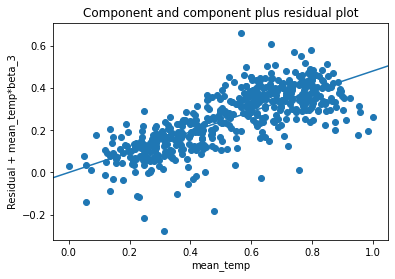

In [95]:

sm.graphics.plot_ccpr(lr_model6, 'mean_temp')

plt.show()



#### Also the above plots shows the relationship between the model and the predictor mean_temp. As we can see, linearity is well preserved


In [96]:
# Prediction on training datset

y_train_pred=lr_model6.predict(X_train_sm6)



## 2. Homoscedacity

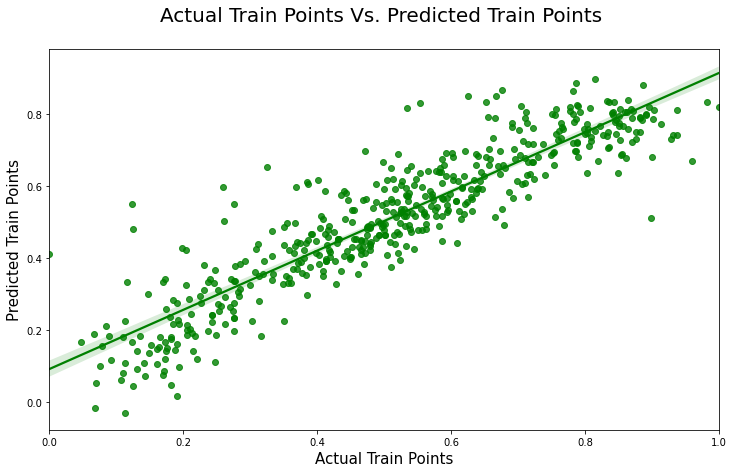

In [97]:

plt.figure(figsize=(12,7))

sns.regplot(x=y_train, y=y_train_pred,color='g')

plt.title('Actual Train Points Vs. Predicted Train Points \n', fontdict={'fontsize': 20})

plt.xlabel('Actual Train Points', fontdict={'fontsize': 15})

plt.ylabel('Predicted Train Points', fontdict={'fontsize': 15})

plt.show()



### Error terms have a uniform variance, meets the assumption for homoscedacity.



## 3. No Multicollinearity




### No Multicollinearity among predictors - This condition was met by the final model where all the VIF values are well within range.




## 4. Residual Analysis of the train data

- ### Now let's check if the error terms are  normally distributed 

- ### let us plot the histogram of the error terms and see what it looks like.


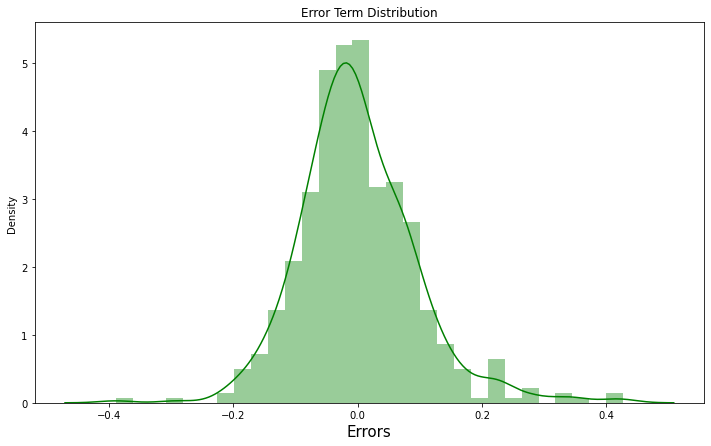

In [98]:

y_train_pred=y_train_pred.values.reshape(510,1)

train_res=y_train_pred-y_train

plt.figure(figsize=(12,7))

sns.distplot(train_res,color='g')

plt.xlabel('Errors', fontdict={'fontsize': 15})

plt.title('Error Term Distribution')

plt.show()



### Error terms are normally distributed, meets the assumption for the normality of error terms.



## 5. No autocorrelation


## The Durbin Watson statistic is a test for autocorrelation in a data set. 

A value of 2.0 means there is no autocorrelation detected in the sample. 
Values from zero to 2.0 indicate positive autocorrelation and values from 2.0 to 4.0 indicate negative autocorrelation.

Here our final model got a score of 2.027 which shows almost zero auto-correlation among variables.



## Step 8. Prediction on Test dataset


In [99]:

# First we need to scale the test data set with same scaler transformation as of training set

bk_test[num_variables]=scaler.transform(bk_test[num_variables])


In [100]:
#Split X and y for prediction

y_test=bk_test.pop('cnt')


In [101]:

# Assign the same set of columns as of training dataset for test set

training_cols=X_train_rfe.columns

X_test=bk_test[training_cols]

# Declare p and N for calculating the adjusted R2

p=len(training_cols)

N=len(X_test)


In [102]:
# Add constant for the statsmodel regressor

X_test_rfe = sm.add_constant(X_test)


In [103]:
#Predict the test set data

y_pred=lr_model6.predict(X_test_rfe)



## Step 9: Model Evaluation

#### Let's now plot the graph for actual versus predicted values.


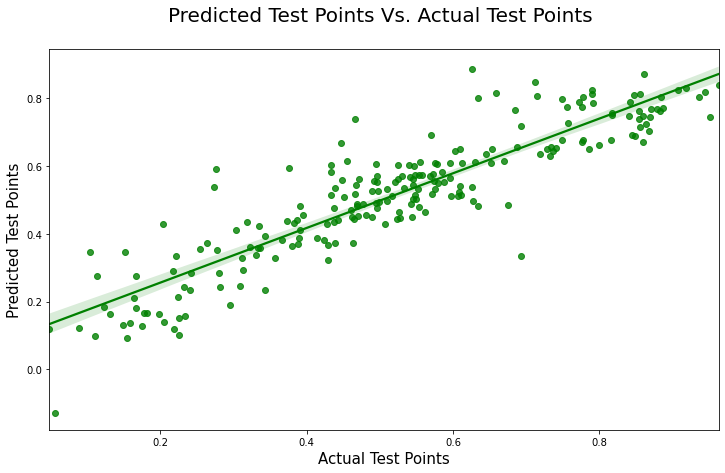

In [104]:
# Testing for Homescedacity - Plotting y_test and y_pred to understand the spread

plt.figure(figsize=(12,7))

sns.regplot(x=y_test, y=y_pred,color='g')

plt.title('Predicted Test Points Vs. Actual Test Points \n', fontdict={'fontsize': 20})

plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})

plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})

plt.show()


In [105]:
# Calculate residuals for test datset

test_res=y_pred-y_test


<AxesSubplot:ylabel='Density'>

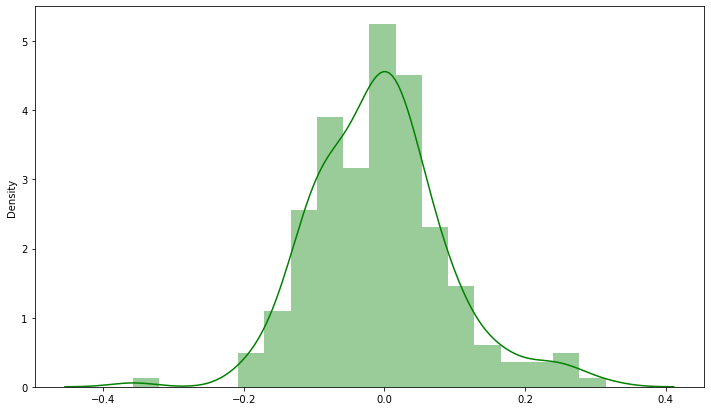

In [106]:
# Normality test

plt.figure(figsize=(12,7))

sns.distplot(test_res,color='g')



## Q-Q Plot


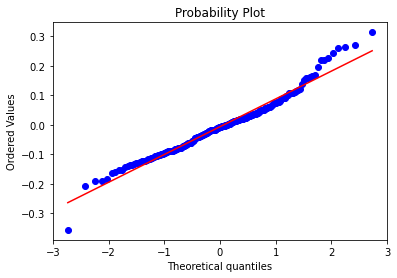

In [107]:

# Lets also check the Q-Q plot for more clarity

# To compare the distribution of errors with normal distribution, we use scipy

import scipy as sp

#Create a figure and axis to plot 

fig, ax = plt.subplots()

_ = sp.stats.probplot(test_res,plot = ax)


In [108]:

from sklearn.metrics import r2_score

r2= r2_score(y_test, y_pred)

print('R-squared for the test data is  : ',round(r2*100,2),'%')


R-squared for the test data is  :  81.11 %


In [109]:
# Adjusted R-squared for Test data

adj_r2 = round((1-((1-r2)*(N-1)/(N-p-1))),3)

print('Adjusted R-squared for the test data is  : ',round(adj_r2*100,2),'%')


Adjusted R-squared for the test data is  :  80.3 %



# Model Summary and inferences



As per the final model, the top 2 positive and negative predictors that influences bike booking are:

#### Positive impact :-

- #### Temperature (mean_temp)

A coefficient value of ‘0.4820’ indicated that temperature has significant impact on bike rentals

- #### Year (yr)

A coefficient value of ‘0.2335’ indicated that a year by year there is an increase in bike rentals.


#### Negative impact :- 

- #### Light Rain & Snow (weathersit =3)

A coefficient value of ‘-0.2957’ indicated that the light snow and rain has a strong negative impact on the rentals.

- #### season_Spring 

A coefficient value of -0.1122 indicates that Spring season also negatively impact the rentals.


It is advisable to give top priority to these variables while planning to achieve maximum bike rental booking.

As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during the warm summer months to promote the business.



## Thank you
